In [32]:
import pandas as pd

from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

from matplotlib import pyplot as plt

from scipy.stats import shapiro

import seaborn as sns

In [2]:
df = pd.read_csv("data/advertising.csv", index_col="id")

In [3]:
X = df[["tv", "radio", "newspaper"]]
y = df["sales"].values

In [4]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42)

In [5]:
# model = DummyRegressor()
model = LinearRegression()

In [6]:
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

In [8]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print(train_mse)
print(test_mse)

2.7678910780469734
2.880023730094194


In [9]:
print(model.intercept_)
print(model.coef_)

2.778303460245281
[0.04543356 0.19145654 0.00256809]


In [14]:
X_train_sm = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train_sm).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     422.2
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           1.02e-71
Time:                        15:47:31   Log-Likelihood:                -289.20
No. Observations:                 150   AIC:                             586.4
Df Residuals:                     146   BIC:                             598.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7783      0.375      7.415      0.000       2.038       3.519
tv             0.0454      0.002     27.960      0.000       0.042       0.049
radio          0.1915      0.010     19.076      0.000       0.172       0.211
newspaper      0.0026      0.007      0.356      0.722      -0.012       0.017
==============================================================================
Omnibus:                       61.891   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.420
Skew:                          -1.581   Prob(JB):                     1.50e-45
Kurtosis:                       7.799   Cond. No.                         485.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
e = (y_train - y_hat_train)
std_residuals = (e - e.mean()) / e.std(ddof=1)

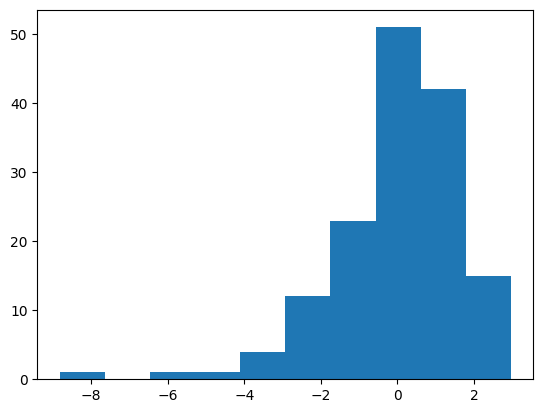

In [20]:
plt.hist(e)
plt.show()

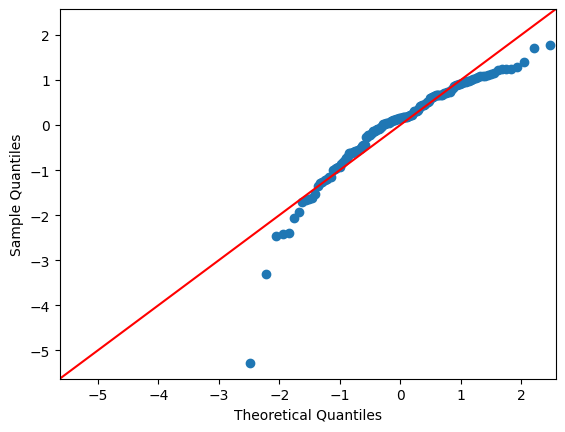

In [27]:
sm.qqplot(std_residuals, line="45")
plt.show()

In [25]:
shapiro(e)

ShapiroResult(statistic=np.float64(0.9000388931210133), pvalue=np.float64(1.3287974818235956e-08))

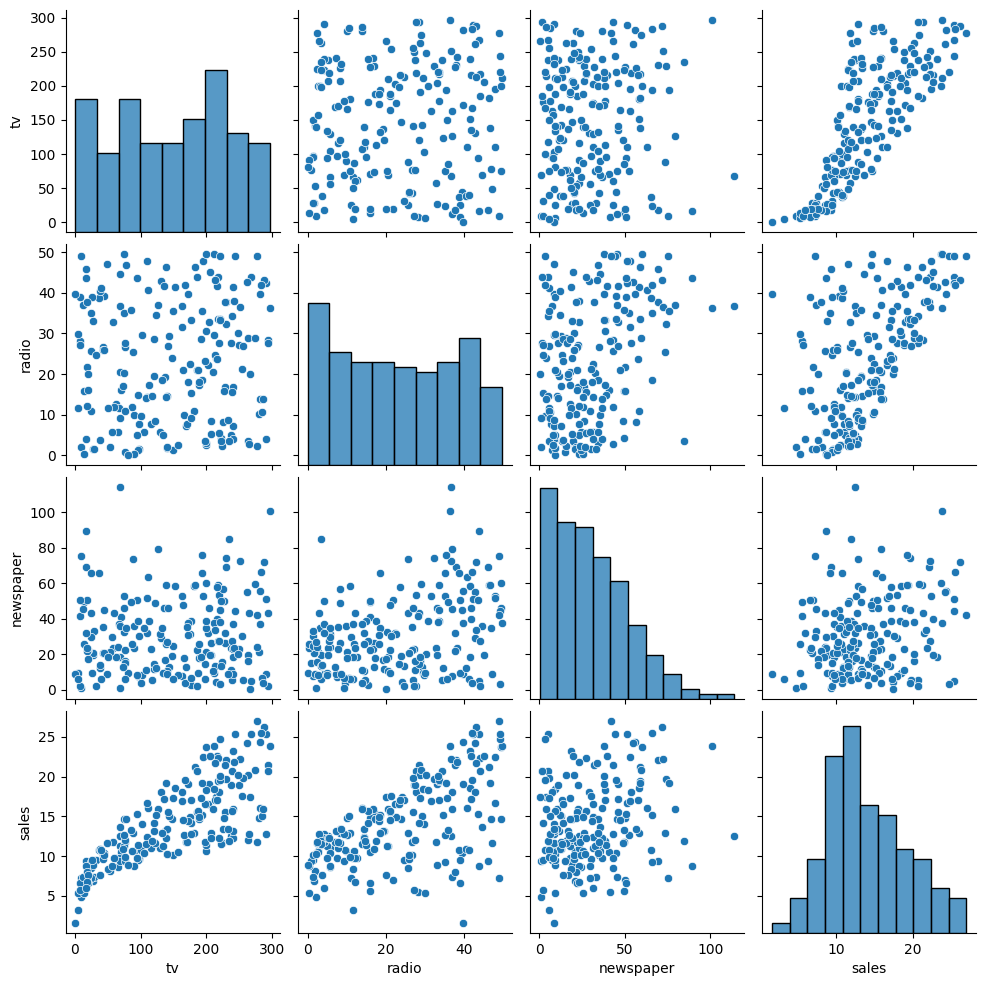

In [33]:
sns.pairplot(df)

In [34]:
sm.stats.diagnostic.linear_reset(results, test_type="exog", power=2)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=32.43750723879931, p-value=4.2322055446159717e-07, df_denom=3>

In [35]:
sm.stats.diagnostic.linear_reset(results, test_type="exog", power=3)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=51.05278500784109, p-value=2.8904918197740294e-09, df_denom=6>